In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_io as tfio
import os
import math
import librosa
import random
import cv2
from PIL import Image

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

plt.style.use('default')

In [2]:
classes = [x for x in os.listdir('data/new_data/train')]
classes

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [3]:
train_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    fill_mode='constant',
    cval=1,
    validation_split=.2,
)

test_gen = tf.keras.preprocessing.image.ImageDataGenerator(validation_split=.2)

In [4]:
train_set = train_gen.flow_from_directory(
    'data/new_data/train',
    target_size=(100, 100),
    color_mode='rgb',
    shuffle=True,
    class_mode='sparse',
    classes=classes,
    subset='training',
)

val_set = train_gen.flow_from_directory(
    'data/new_data/train',
    target_size=(100, 100),
    color_mode='rgb',
    class_mode='sparse',
    classes=classes,
    subset='validation',
)

test_set = test_gen.flow_from_directory(
    'data/new_data/test',
    target_size=(100, 100),
    color_mode='rgb',
    class_mode='sparse',
    classes=classes,
    subset='validation',
)

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 1460 images belonging to 7 classes.


In [5]:
test_image = "data/new_data/train/disgust/Training_659019.jpg"

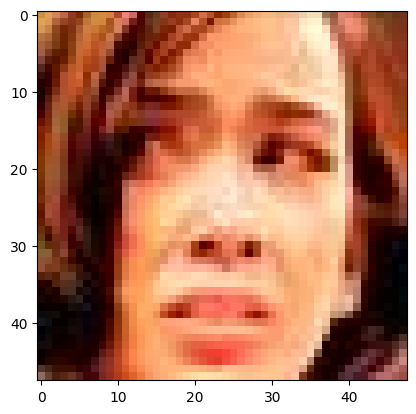

In [6]:
img = cv2.imread(test_image, cv2.IMREAD_COLOR_RGB)
plt.imshow(img)

In [7]:
img.shape

(48, 48, 3)

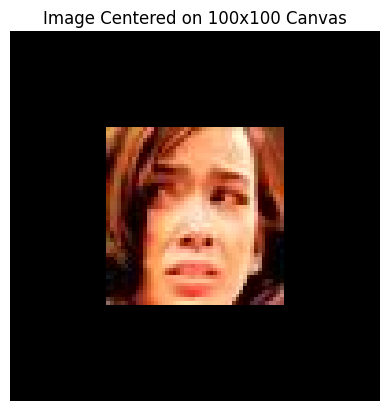

In [8]:
h, w, c = img.shape

canvas = np.zeros((100, 100, 3), dtype=np.uint8)

x_offset = (100 - w) // 2
y_offset = (100 - h) // 2

canvas[y_offset:y_offset + h, x_offset:x_offset + w] = img

# Display the result
plt.imshow(canvas)
plt.title('Image Centered on 100x100 Canvas')
plt.axis('off')
plt.show()

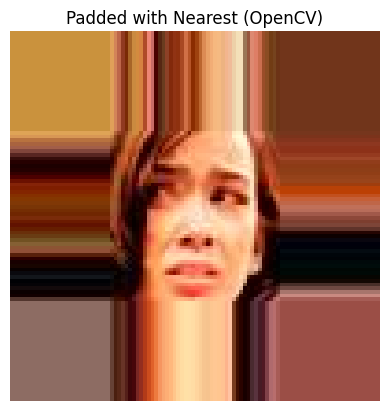

In [9]:
desired_size = 100
old_size = img.shape[:2]  # (height, width)

delta_w = desired_size - old_size[1]
delta_h = desired_size - old_size[0]
top, bottom = delta_h // 2, delta_h - (delta_h // 2)
left, right = delta_w // 2, delta_w - (delta_w // 2)

padded_img = cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_REPLICATE)

plt.imshow(padded_img)
plt.title("Padded with Nearest (OpenCV)")
plt.axis("off")
plt.show()

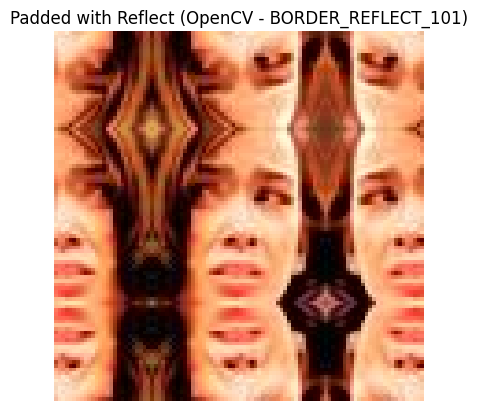

In [10]:
desired_size = 100
old_size = img.shape[:2]

delta_w = desired_size - old_size[1]
delta_h = desired_size - old_size[0]
top, bottom = delta_h // 2, delta_h - (delta_h // 2)
left, right = delta_w // 2, delta_w - (delta_w // 2)

padded_img = cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_REFLECT_101)

# Show result
plt.imshow(padded_img)
plt.title("Padded with Reflect (OpenCV - BORDER_REFLECT_101)")
plt.axis("off")
plt.show()


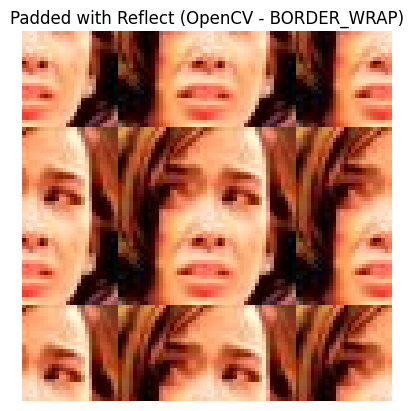

In [11]:
desired_size = 100
old_size = img.shape[:2]

delta_w = desired_size - old_size[1]
delta_h = desired_size - old_size[0]
top, bottom = delta_h // 2, delta_h - (delta_h // 2)
left, right = delta_w // 2, delta_w - (delta_w // 2)

padded_img = cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_WRAP)

plt.imshow(padded_img)
plt.title("Padded with Reflect (OpenCV - BORDER_WRAP)")
plt.axis("off")
plt.show()


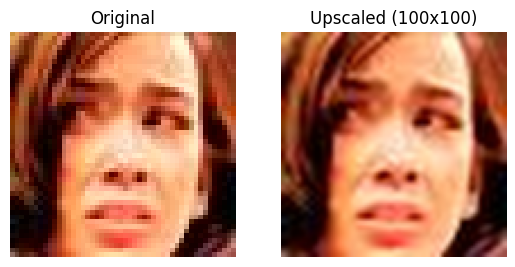

In [12]:
resized_img = cv2.resize(img, (100, 100), interpolation=cv2.INTER_LANCZOS4)

plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(img)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Upscaled (100x100)")
plt.imshow(resized_img)
plt.axis('off')

plt.show()

In [13]:
def preprocess_image(image):
    image = cv2.imread(image, cv2.IMREAD_COLOR_RGB)
    h, w, c = image.shape
    desired_size = 100
    old_size = img.shape[:2]

    delta_w = desired_size - old_size[1]
    delta_h = desired_size - old_size[0]
    top, bottom = delta_h // 2, delta_h - (delta_h // 2)
    left, right = delta_w // 2, delta_w - (delta_w // 2)

    padded_img = cv2.copyMakeBorder(image, top, bottom, left, right, cv2.BORDER_WRAP)
    return padded_img


def upscale_image(img_path):
    image = cv2.imread(img_path, cv2.IMREAD_COLOR_RGB)
    resize_upscale = cv2.resize(image, (100, 100), interpolation=cv2.INTER_LANCZOS4)
    return resize_upscale

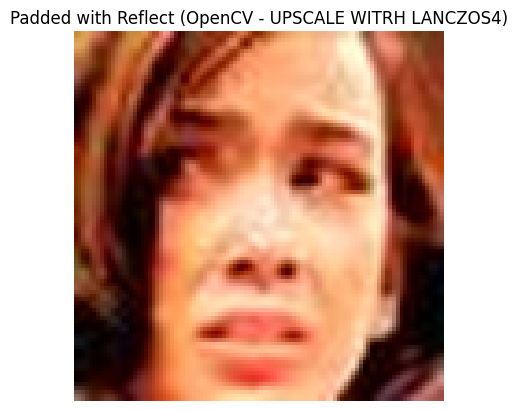

In [14]:
test_data = upscale_image(test_image)
plt.imshow(test_data)
plt.title("Padded with Reflect (OpenCV - UPSCALE WITRH LANCZOS4)")
plt.axis("off")
plt.show()


In [15]:
train_path = os.path.join('data', 'new_data', 'train')
test_path = os.path.join('data', 'new_data', 'test')

In [16]:
filepath = []
label = []

i = 0
for classes in os.listdir(os.path.join(train_path)):
    for file in os.listdir(os.path.join(train_path, classes)):
        path = os.path.join(train_path, classes, file)
        filepath.append(path)
        label.append(classes)

train_df = pd.DataFrame({
    'filepath': filepath,
    'label': label
})

del filepath, label

print(train_df.shape)
print(train_df['label'].unique())
train_df.head()

(28709, 2)
['angry' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']


filepath  label
0  data\new_data\train\angry\Training_10118481.jpg  angry
1  data\new_data\train\angry\Training_10120469.jpg  angry
2  data\new_data\train\angry\Training_10131352.jpg  angry
3  data\new_data\train\angry\Training_10161559.jpg  angry
4   data\new_data\train\angry\Training_1021836.jpg  angry

In [17]:
filepath = []
label = []

i = 0
for classes in os.listdir(os.path.join(test_path)):
    for file in os.listdir(os.path.join(test_path, classes)):
        path = os.path.join(test_path, classes, file)
        filepath.append(path)
        label.append(classes)

test_df = pd.DataFrame({
    'filepath': filepath,
    'label': label
})

del filepath, label

print(test_df.shape)
print(test_df['label'].unique())
test_df.head()

(7311, 2)
['angry' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']


filepath  label
0     data\new_data\test\angry\Anger.jpg  angry
1   data\new_data\test\angry\Anger_1.jpg  angry
2  data\new_data\test\angry\Anger_10.jpg  angry
3  data\new_data\test\angry\Anger_11.jpg  angry
4  data\new_data\test\angry\Anger_12.jpg  angry

In [18]:
train_df['data'] = train_df['filepath'].apply(lambda x: upscale_image(x))
test_df['data'] = test_df['filepath'].apply(lambda x: upscale_image(x))

In [19]:
train_df.head()

filepath  label  \
0  data\new_data\train\angry\Training_10118481.jpg  angry   
1  data\new_data\train\angry\Training_10120469.jpg  angry   
2  data\new_data\train\angry\Training_10131352.jpg  angry   
3  data\new_data\train\angry\Training_10161559.jpg  angry   
4   data\new_data\train\angry\Training_1021836.jpg  angry   

                                                data  
0  [[[77, 52, 47], [71, 46, 41], [58, 33, 28], [4...  
1  [[[21, 16, 20], [24, 19, 23], [31, 26, 30], [3...  
2  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...  
3  [[[179, 150, 136], [174, 145, 131], [164, 134,...  
4  [[[224, 208, 192], [225, 208, 192], [226, 210,...

In [20]:
random_index = random.randint(0, len(train_df) - 1)
print(random_index)
random_row = train_df.iloc[[random_index]]
print(random_row)

19896
                                                filepath    label  \
19896  data\new_data\train\neutral\Training_85413312.jpg  neutral   

                                                    data  
19896  [[[0, 8, 0], [0, 8, 0], [0, 9, 0], [5, 8, 0], ...  


In [21]:
random_row['data'].values[0].shape

(100, 100, 3)

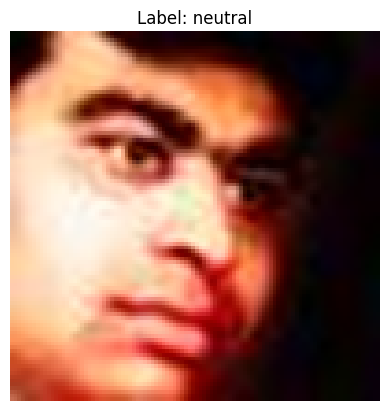

In [22]:
image_array = np.array(random_row['data'].values[0], dtype=np.uint8)

plt.imshow(image_array)
plt.axis('off')
plt.title(f"Label: {random_row['label'].values[0]}")
plt.show()


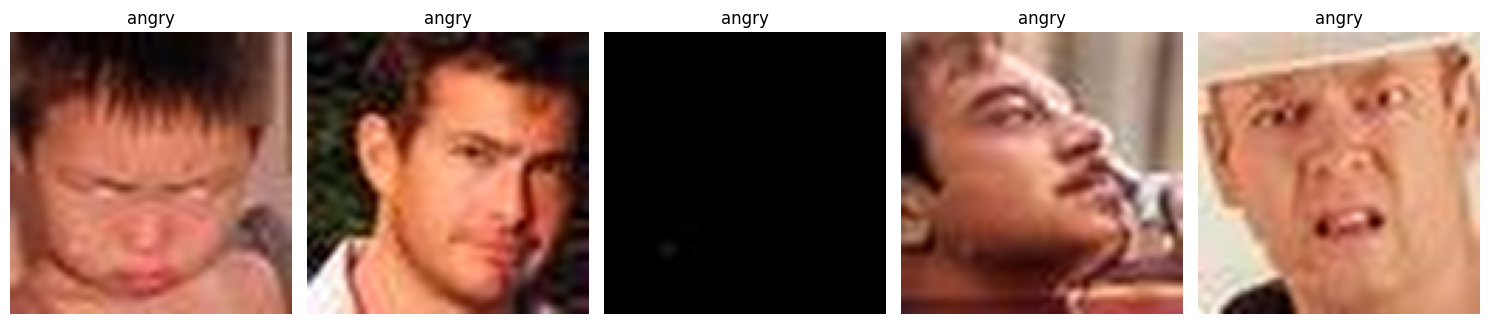

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Plot 5 gambar pertama dari train_df
plt.figure(figsize=(15, 5))  # Atur ukuran figure

for i in range(5):
    row = train_df.iloc[i]
    image_array = np.array(row['data'], dtype=np.uint8)

    plt.subplot(1, 5, i + 1)  # Layout 1 baris, 5 kolom
    plt.imshow(image_array)
    plt.axis('off')
    plt.title(row['label'])

plt.tight_layout()
plt.show()


In [24]:
def plot_images_per_class(df, n_images=5):
    classes = df['label'].unique()

    plt.figure(figsize=(n_images * 3, len(classes) * 3))
    for i, lbl in enumerate(classes):
        class_df = df[df['label'] == lbl]
        available = len(class_df)

        if available == 0:
            print(f"Skipping class '{lbl}' — no images available.")
            continue

        n_samples = min(n_images, available)
        random_images = class_df.sample(n=n_samples)

        for j, (idx, row) in enumerate(random_images.iterrows()):
            img_array = row['data']  # array RGB-nya
            plt.subplot(len(classes), n_images, i * n_images + j + 1)
            plt.imshow(img_array.astype("uint8"))
            plt.axis('off')
            plt.title(f'{lbl}')

    plt.tight_layout()
    plt.show()

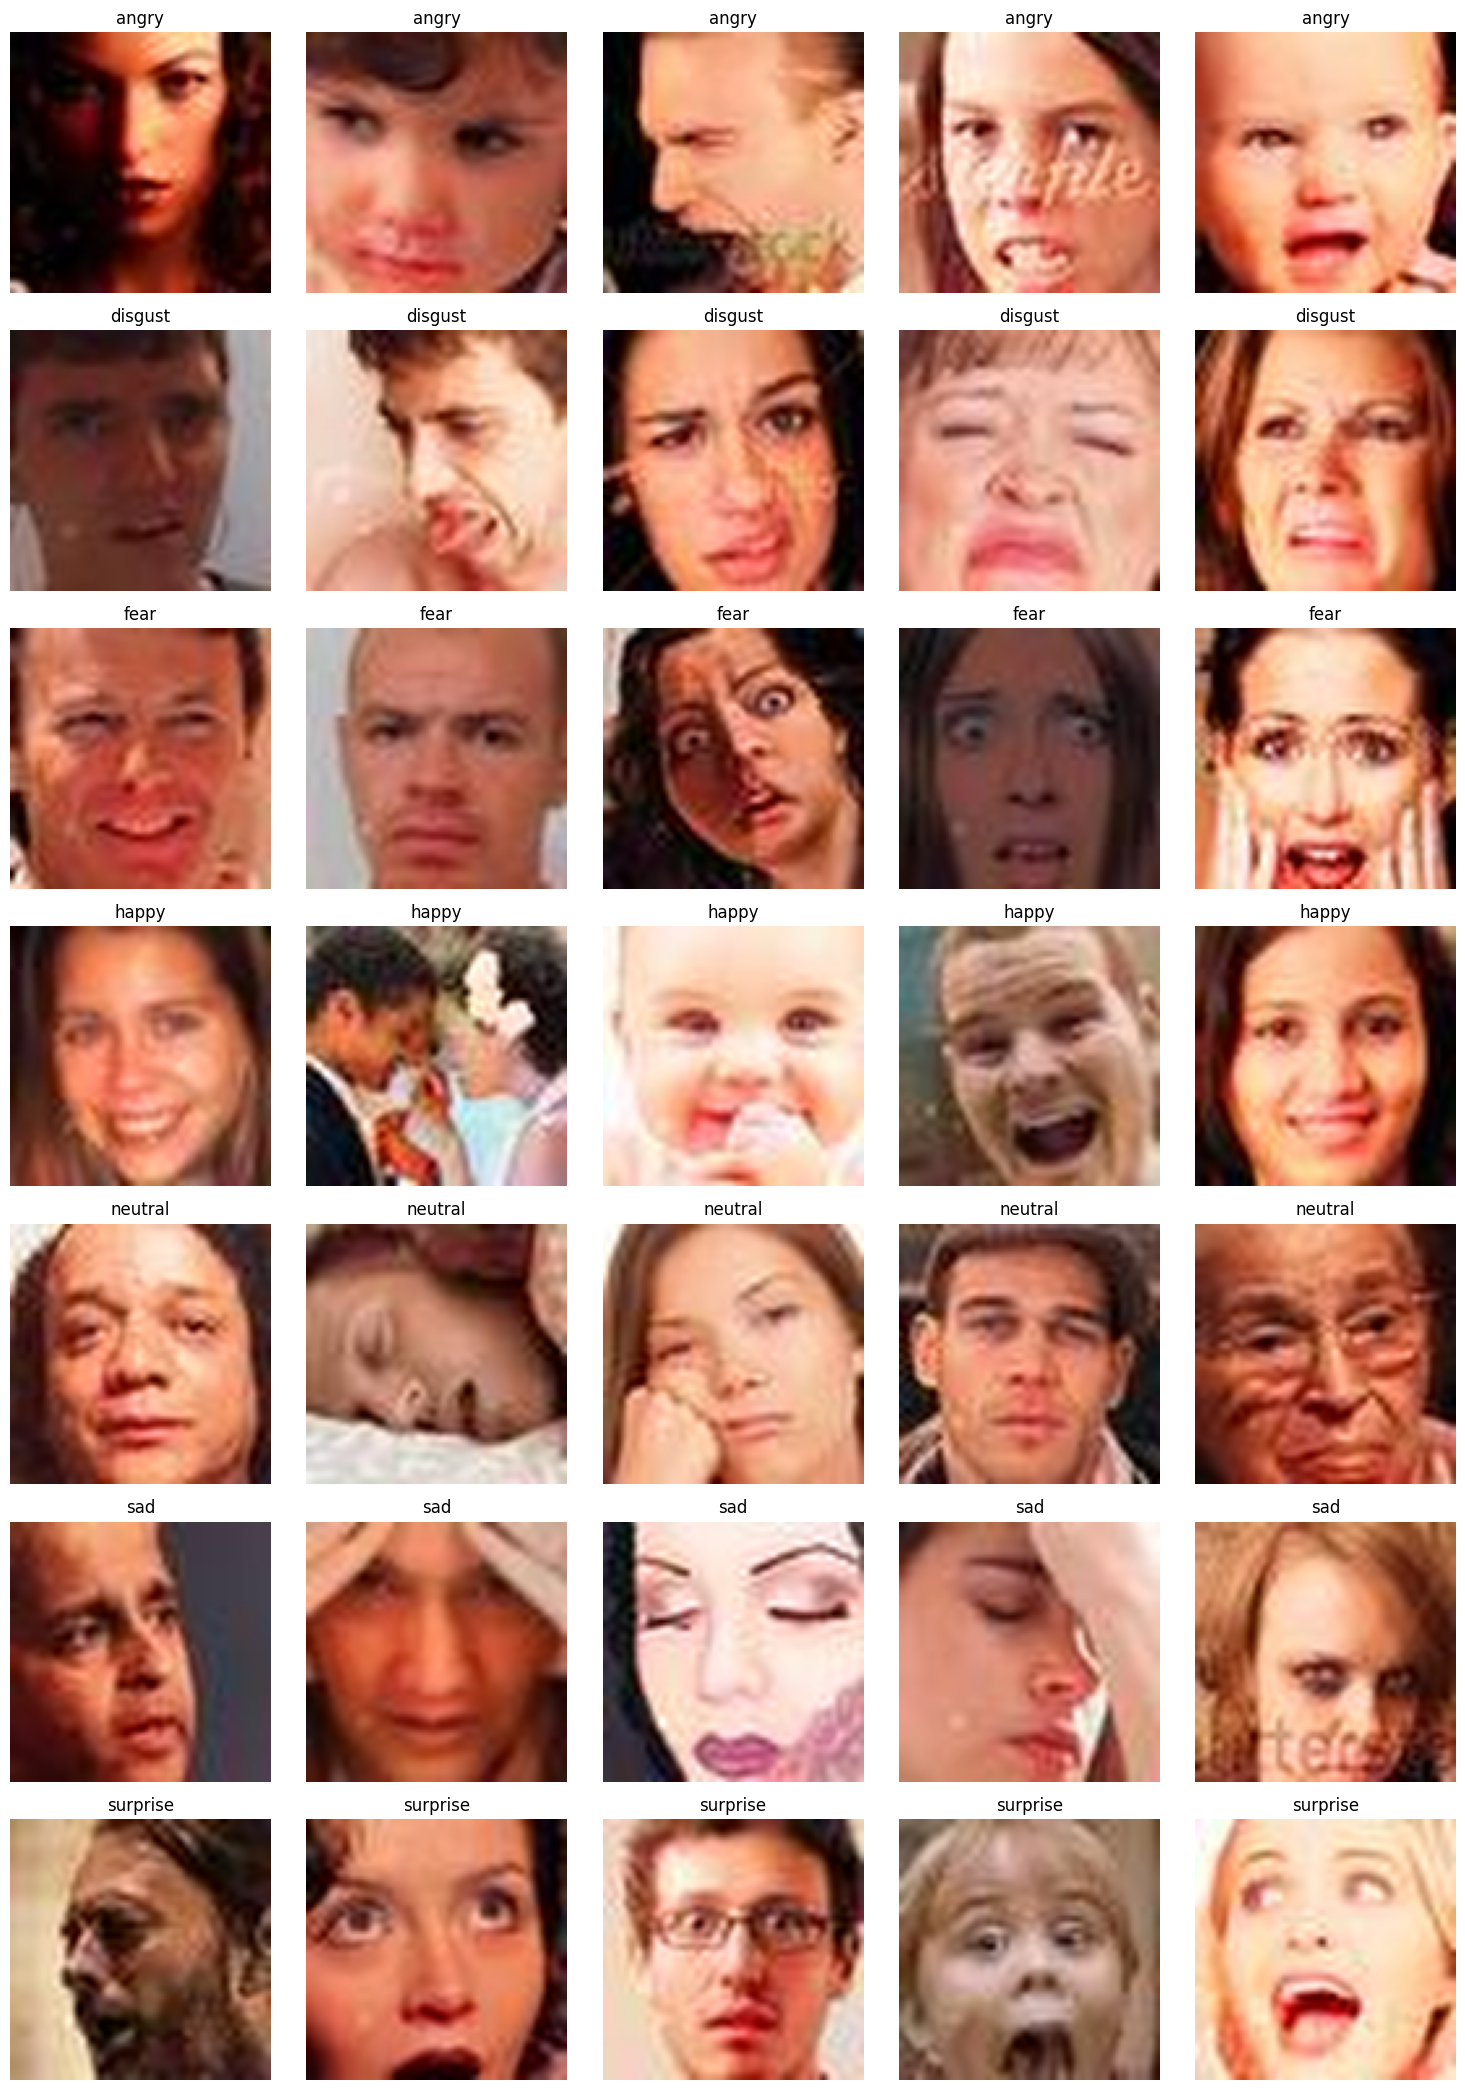

In [25]:
plot_images_per_class(train_df)

In [26]:
train_df, val_df = train_test_split(train_df, test_size=.3, random_state=42)
val_df.head()

filepath     label  \
4974      data\new_data\train\fear\Training_22695598.jpg      fear   
11509    data\new_data\train\happy\Training_47178464.jpg     happy   
27921  data\new_data\train\surprise\Training_76747047...  surprise   
4981      data\new_data\train\fear\Training_22757966.jpg      fear   
27982  data\new_data\train\surprise\Training_78696030...  surprise   

                                                    data  
4974   [[[78, 75, 68], [61, 58, 52], [32, 31, 25], [1...  
11509  [[[60, 33, 26], [57, 31, 23], [52, 26, 20], [4...  
27921  [[[248, 255, 255], [248, 255, 255], [248, 255,...  
4981   [[[94, 65, 59], [97, 68, 62], [107, 81, 76], [...  
27982  [[[48, 27, 26], [48, 26, 25], [49, 25, 25], [5...

In [1]:
cm = [
    [185, 0, 0, 0, 0, 0, 0, 0],
    [0, 259, 0, 0, 0, 0, 0, 0],
    [0, 0, 259, 0, 0, 0, 0, 0],
    [0, 0, 0, 84, 0, 34, 0, 0],
    [0, 0, 0, 0, 259, 0, 0, 0],
    [0, 0, 0, 44, 0, 149, 0, 0],
    [0, 0, 0, 0, 0, 0, 227, 0],
    [0, 0, 0, 0, 0, 0, 0, 270],
]

In [5]:
classes = ['age day 1 to 15',
 'age day 106 to 120',
 'age day 16 to 30',
 'age day 31 to 45',
 'age day 46 to 60',
 'age day 61 to 75',
 'age day 76 to 90',
 'age day 91 to 105']


([<matplotlib.axis.YTick at 0x263c119c940>,
 [Text(0, 0, 'age day 1 to 15'),
  Text(0, 1, 'age day 106 to 120'),
  Text(0, 2, 'age day 16 to 30'),
  Text(0, 3, 'age day 31 to 45'),
  Text(0, 4, 'age day 46 to 60'),
  Text(0, 5, 'age day 61 to 75'),
  Text(0, 6, 'age day 76 to 90'),
  Text(0, 7, 'age day 91 to 105')])

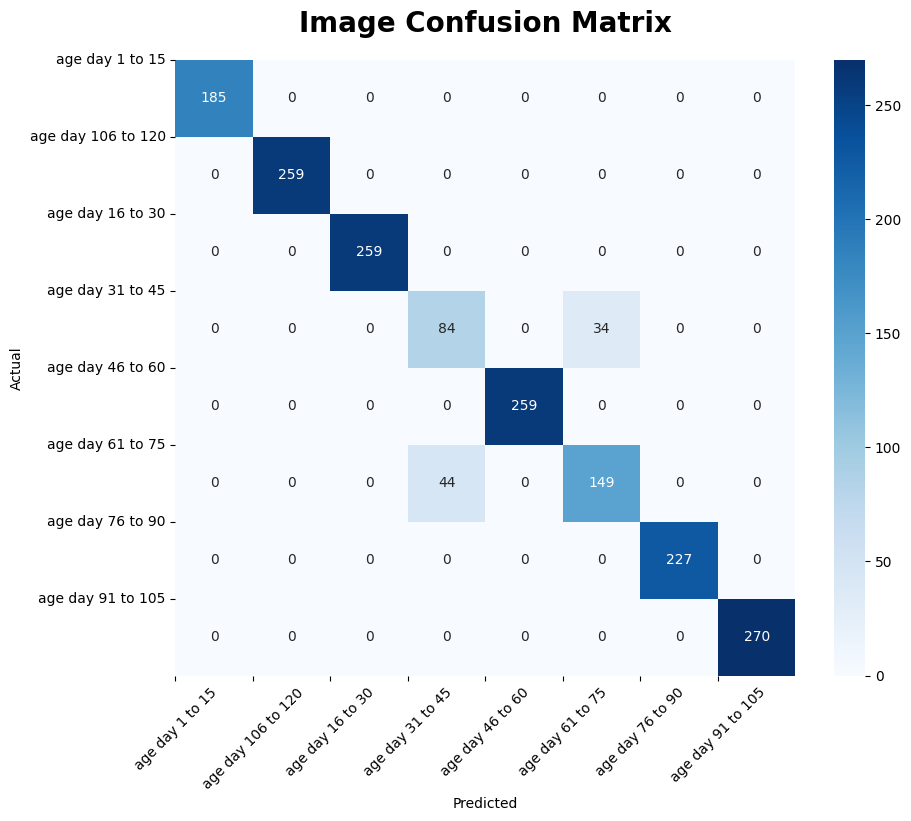

In [6]:
from matplotlib import pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 8))  # Set the figure size if needed
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

plt.title('Image Confusion Matrix', pad=20, fontsize=20, fontweight="bold")
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Set ticks for the x and y axes using class names
plt.xticks(ticks=range(len(classes)), labels=classes, rotation=45)
plt.yticks(ticks=range(len(classes)), labels=classes, rotation=0)